# **Lecture (Codes by prof.)**

In [1]:
import numpy as np

In [2]:
true_b = 1
true_w = 2
N = 100   #number of data

In [3]:
np.random.seed(42)

In [4]:
x = np.random.rand(N,1)
epsilon = (0.1*np.random.randn(N,1))

y= true_b + true_w*x + epsilon #data generation

In [5]:
#Shuffles the indices

idx = np.arange(N)
split_index = int(N*0.8) #train-validationi split
## 관행적으로 4:1 (즉 80% = 0.8) 로 train-valid set split하기 때문에, 똑같이 함 (like p-val = 0.05)

In [6]:
train_idx = idx[:split_index]
val_idx = idx[split_index:]  

##개인 필기: validation set과 test set의 차이?
###이는 단순히 명칭을 구분함으로써 오는 차이가 아니다.
###test set은 training set과 완전히 구분되어있어야 하는 반면, valid set은 그렇지 않다.
###예로, 특정 dataset을 4:1로 나눈다음 4짜리 training part를 한 바퀴만 학습시켰으면 그 1은 test set으로 간주할 수 있으나,
####epoch 값이나 learning rate를 여러번 바꿔가면서 돌렸다면 그 순간 그 1은 test가 아닌 valid set이 된다.

In [7]:
#Generates train and validation sets

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val =- x[val_idx], y[val_idx]

In [8]:
## Model Settings

def train_model_numpy(lr=0.1, epochs =1000):
    #Initialize parameters (초기 설정이 엄청 중요)
    b = np.random.randn(1)
    w = np.random.randn(1)
    
    for epoch in range(epochs):
        #Loss computation
        y_hat = b + w*x_train
        error = (y_hat - y_train)
        mse_loss = np.mean(error**2)
        #학습 중인 parameter를 기반으로 loss를 계산합니다.
        #다만 이 코드에서는 mse_loss는 사용하지 않습니다.
        
        #Graident computation
        b_grad = 2 * np.mean(error)
        w_grad = 2 * np.mean(x_train*error)
        b = b - lr*b_grad
        w = w - lr*w_grad
    
    return b, w

In [9]:
train_model_numpy(1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-8-78cc03ba6c79>:12: RuntimeWarning: overflow encountered in square
  mse_loss = np.mean(error**2)


(array([-1.18566342e+167]), array([-5.97013142e+166]))

In [10]:
import time
def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        computation_time = end_time - start_time
        print("Execution time of {}: {} seconds".format(func.__name__,computation_time)) 
        #괄호 안에 순서대로 format의 값들을 집어넣는 방식
        return result
    return wrapper

In [11]:
#Model with timer

@timer
def train_model_numpy(lr=0.1, epochs =1000):
    #Initialize parameters (초기 설정이 엄청 중요)
    b = np.random.randn(1)
    w = np.random.randn(1)
    
    for epoch in range(epochs):
        #Loss computation
        y_hat = b + w*x_train
        error = (y_hat - y_train)
        mse_loss = np.mean(error**2)
        #학습 중인 parameter를 기반으로 loss를 계산합니다.
        #다만 이 코드에서는 mse_loss는 사용하지 않습니다.
        
        #Graident computation
        b_grad = 2 * np.mean(error)
        w_grad = 2 * np.mean(x_train*error)
        b = b - lr*b_grad
        w = w - lr*w_grad
    
    return b, w

In [12]:
b_hat, w_hat = train_model_numpy()
print("b_estimate: {}. w_estimate: {}".format(b_hat, w_hat))

Execution time of train_model_numpy: 0.026939868927001953 seconds
b_estimate: [1.0234136]. w_estimate: [1.93680757]


**Now Pytorch**

In [13]:
import torch

#create tensor @CPU
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

#create tensor @GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'  ##GPU 위로 올리려는 일임 (하드웨어 이슈)
x_train_tensor = torch.as_tensor(x_train).to(device)  #to(device) 설정을 해줘야지만 GPU로 확실하게 올라감
y_train_tensor = torch.as_tensor(y_train).to(device)  #그리고 CPU에 올라간 데이터와 GPU에 올라간 데이터 간 에는 소통(=연산)이 안된다.


##개인 질문: Jupyter(Local)에서 GPU 위로 잘 올라가는지 확인을 하는 방법이 있는지?

In [14]:
x_train_tensor

tensor([[0.3745],
        [0.9507],
        [0.7320],
        [0.5987],
        [0.1560],
        [0.1560],
        [0.0581],
        [0.8662],
        [0.6011],
        [0.7081],
        [0.0206],
        [0.9699],
        [0.8324],
        [0.2123],
        [0.1818],
        [0.1834],
        [0.3042],
        [0.5248],
        [0.4319],
        [0.2912],
        [0.6119],
        [0.1395],
        [0.2921],
        [0.3664],
        [0.4561],
        [0.7852],
        [0.1997],
        [0.5142],
        [0.5924],
        [0.0465],
        [0.6075],
        [0.1705],
        [0.0651],
        [0.9489],
        [0.9656],
        [0.8084],
        [0.3046],
        [0.0977],
        [0.6842],
        [0.4402],
        [0.1220],
        [0.4952],
        [0.0344],
        [0.9093],
        [0.2588],
        [0.6625],
        [0.3117],
        [0.5201],
        [0.5467],
        [0.1849],
        [0.9696],
        [0.7751],
        [0.9395],
        [0.8948],
        [0.5979],
        [0

In [15]:
## Model Settings_2

@timer
def train_model_torch(lr=0.1, epochs =1000):
    #Initialize parameters (초기 설정이 엄청 중요)
    b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
    w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
    #일단 1로 initialize하는건 똑같은데, 뒤의 param? 이 더 붙음
    ##requires_grad: autograd 기능 커는 것(즉 수동으로 미분 계산할 필요 없음)
    ###또한 이것이 학습대상임을 지시해주는 기능도 함 (b가 바로 학습대상이에요~!)
    ##dtype: 데이터의 타입을 정함(numeric을 정수로 읽어낼지, float로 읽어낼지 등)
    ###default 값은 float32 (현재 코드는 float64로 설정하는 것)
    ##device: CPU or GPU 선택
    
    for epoch in range(epochs):
        #Loss computation
        y_hat = b + w*x_train_tensor
        error = (y_hat - y_train_tensor)
        mse_loss = torch.mean(error**2)
        #학습 중인 parameter를 기반으로 loss를 계산합니다.
        #다만 이 코드에서는 mse_loss는 사용하지 않습니다.
        
        #Graident computation and descent
        mse_loss.backward()
        ##mse loss 값을 수동으로 계산하지 않고 자동으로 계산함
        with torch.no_grad():  #Autograd 기능을 잠깐 멈춤; 왜? RAM 과부하 때문에 (알고리즘 상 안끄면 과부하 걸림)
            b -= lr*b.grad ###자동으로 미분값을 빼주는 기호: '-='
            w -= lr*w.grad ###in-plae operation: 데이터의 사본을 만들지 않고 원본을 덮어씌우는 기능 
        b.grad.zero_()
        w.grad.zero_()
    
    return b, w

In [16]:
b_hat, w_hat = train_model_torch()
print("b_estimate: {}. w_estimate: {}".format(b_hat, w_hat))

Execution time of train_model_torch: 0.1834094524383545 seconds
b_estimate: tensor([1.0234], requires_grad=True). w_estimate: tensor([1.9368], requires_grad=True)


In [17]:
import torch.optim as optim #optimizer
import torch.nn as nn

In [291]:
## Model Settings_3
###Model_2 에 비해서 어느 부분이 축소(자동화) 되었는지 리뷰해볼 것!

@timer
def train_model_torch_2(lr=0.1, epochs =1000):
    #Initialize parameters (초기 설정이 엄청 중요)
    b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
    w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
    
    parameters = [b, w]
    optimizer = optim.SGD(parameters, lr=lr)
    mse_loss = nn.MSELoss()
    
    for epoch in range(epochs):
        #Loss computation
        y_hat = b + w*x_train_tensor
        loss = mse_loss(y_hat, y_train_tensor)
        #Graident computation and descent
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    return b, w

In [292]:
b_hat, w_hat = train_model_torch_2()
print("b_estimate: {}. w_estimate: {}".format(b_hat, w_hat))

Execution time of train_model_torch_2: 0.15007996559143066 seconds
b_estimate: tensor([1.0234], requires_grad=True). w_estimate: tensor([1.9368], requires_grad=True)


# **Group Quiz**

### Q1

### Pytorch로 추정한 parameter를 이용해서 test(=valid) 데이터에서 MSE error를 계산하는 코드를 구현하시오.

#### - NumPy 코드 사용 금지
#### - GPU device 사용하기

In [293]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'  ##GPU 위로 올리려는 일임 (하드웨어 이슈)
x_val_tensor = torch.as_tensor(x_val).to(device)  #to(device) 설정을 해줘야지만 GPU로 확실하게 올라감
y_val_tensor = torch.as_tensor(y_val).to(device)  #그리고 CPU에 올라간 데이터와 GPU에 올라간 데이터 간 에는 소통(=연산)이 안된다.


##개인 질문: Jupyter(Local)에서 GPU 위로 잘 올라가는지 확인을 하는 방법이 있는지?

In [294]:
@timer
def test_model_torch(lr=0.1, epochs =1000):
    #Initialize parameters (초기 설정이 엄청 중요)
    b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
    w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
    
    parameters = [b, w]
    optimizer = optim.SGD(parameters, lr=lr)
    mse_loss = nn.MSELoss()
    
    for epoch in range(epochs):
        #Loss computation
        y_hat = b + w*x_val_tensor
        loss = mse_loss(y_hat, y_val_tensor)
        #Graident computation and descent
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    return b, w, loss

In [295]:
b_hat, w_hat, loss = test_model_torch()
print("b_estimate: {}. w_estimate: {}, mse_loss: {}".format(b_hat, w_hat, loss))

print("answer = {}".format(loss))

Execution time of test_model_torch: 0.15624594688415527 seconds
b_estimate: tensor([1.0046], requires_grad=True). w_estimate: tensor([-2.0390], requires_grad=True), mse_loss: 0.008080893569141337
answer = 0.008080893569141337


##### 개인 질문:  그런데 validation set의 MSE를 구하라는 것이라면 혹시 train 단계에서 얻어진 parameter들을 활용하라는 의미일까요?

### Q2

### Slack에 올라온 데이터셋을 fitting 하는 함수의 parameter 추정
#### (오늘 수업 외) 추가 라이브러리 사용 금지
#### 10회 반복 측정한 평균 test MSE error 값 0.05 미만
#### (도전) 학습시간 500ms (=0.5초) 미만

In [23]:
dir = "C:/Users/playp/Desktop/현재 작업 중인 폴더/2023(휴학 및 재정비)/여름방학\[Pre-STAT433] 딥러닝 프로그래밍 스터디"

In [24]:
import numpy as np
import time
import torch
import torch.optim as optim #optimizer
import torch.nn as nn

In [25]:
import os  #os는 봐주세요 교수님...ㅠㅠ

os.chdir(dir)

In [26]:
import pickle

with open('quiz_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [27]:
str(data)

"{'x': array([[0.37454012],\n       [0.95071431],\n       [0.73199394],\n       [0.59865848],\n       [0.15601864],\n       [0.15599452],\n       [0.05808361],\n       [0.86617615],\n       [0.60111501],\n       [0.70807258],\n       [0.02058449],\n       [0.96990985],\n       [0.83244264],\n       [0.21233911],\n       [0.18182497],\n       [0.18340451],\n       [0.30424224],\n       [0.52475643],\n       [0.43194502],\n       [0.29122914],\n       [0.61185289],\n       [0.13949386],\n       [0.29214465],\n       [0.36636184],\n       [0.45606998],\n       [0.78517596],\n       [0.19967378],\n       [0.51423444],\n       [0.59241457],\n       [0.04645041],\n       [0.60754485],\n       [0.17052412],\n       [0.06505159],\n       [0.94888554],\n       [0.96563203],\n       [0.80839735],\n       [0.30461377],\n       [0.09767211],\n       [0.68423303],\n       [0.44015249],\n       [0.12203823],\n       [0.49517691],\n       [0.03438852],\n       [0.9093204 ],\n       [0.25877998],\n   

In [28]:
x_data = data['x']
y_data = data['y']

In [29]:
#Shuffles the indices
idx = np.arange(N)
split_index = int(N*0.8) #train-validationi split
## 관행적으로 4:1 (즉 80% = 0.8) 로 train-valid set split하기 때문에, 똑같이 함 (like p-val = 0.05)

train_idx = idx[:split_index]
val_idx = idx[split_index:]

In [30]:
x_data_train, y_data_train = x_data[train_idx], y_data[train_idx]
x_data_val, y_data_val = x_data[val_idx], y_data[val_idx]

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'  ##GPU 위로 올리려는 일임 (하드웨어 이슈)

x_data_train_tensor = torch.as_tensor(x_data_train).to(device)
y_data_train_tensor = torch.as_tensor(y_data_train).to(device)

x_data_val_tensor = torch.as_tensor(x_data_val).to(device)
y_data_val_tensor = torch.as_tensor(y_data_val).to(device)

In [284]:
@timer
def train_model_quiz(lr=0.1, epochs=1000):
    #Initialize parameters (초기 설정이 엄청 중요)
    b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
    w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
    
    parameters = [b, w]
    optimizer = optim.SGD(parameters, lr=lr)
    mse_loss = nn.MSELoss()
    
    np.random.seed(42)
    
    for epoch in range(epochs):
        #Loss computation
        y_hat = b + w*x_val_tensor
        loss = mse_loss(y_hat, y_val_tensor)
        #Graident computation and descent
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    return b, w, loss

In [289]:
b_hat, w_hat, loss = train_model_quiz()
print("b_estimate: {}. w_estimate: {}, mse_loss: {}".format(b_hat, w_hat, loss))

print("answer = {}".format(loss))
#수업 그대로 선형회귀 적용 시 loss값이 개판인 것을 확인할 수 있다. EDA부터 다시 시작.

Execution time of train_model_quiz: 0.15655946731567383 seconds
b_estimate: tensor([1.0046], requires_grad=True). w_estimate: tensor([-2.0390], requires_grad=True), mse_loss: 0.008080893590405485
answer = 0.008080893590405485


##### 개인 질문: 왜 Seed값을 고정했음에도 불구하고 mse loss 값이 계속 바뀌는지요?

### EDA

In [34]:
len(x_data), len(y_data)

(100, 100)

In [48]:
#Pytorch로는 어떻게 시각화해야하는지 잘 모르겠습니다.

from matplotlib import pyplot as plt
import pandas as pd

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

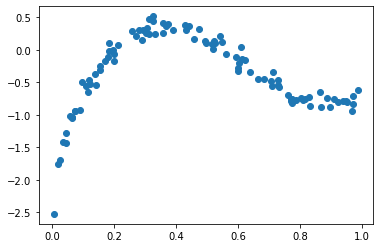

In [203]:
plt.scatter(x_data, y_data)

#그래프가 단조함수가 아님을 알 수 있다.
#과적합을 각오하고서라도 구간별로 회귀적합을 다르게 하는 방식을 고려해본다.

In [159]:
x_data[np.argmax(y_data)]
np.where(x_temp==x_data[np.argmax(y_data)])

(array([59], dtype=int64),)

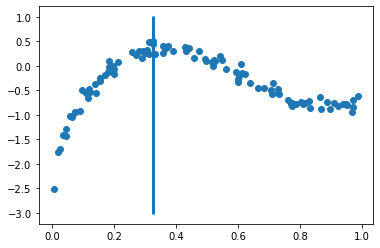

In [92]:
plt.scatter(x_data, y_data)
plt.vlines(x=0.32533033, ymin=min(y_data)-0.5, ymax=max(y_data)+0.5, linewidth=3)

### Pre-Processing (Spliting)

In [110]:
?np.concatenate

In [125]:
x_temp=sum(x_data.tolist(),[])

In [126]:
y_temp=sum(y_data.tolist(),[])

In [168]:
data_temp=list(zip(x_temp,y_temp))
data_temp_sorted=sorted(data_temp)

In [170]:
np.where(data_temp_sorted==x_data[np.argmax(y_data)])

(array([39], dtype=int64), array([0], dtype=int64))

In [220]:
data_temp_front = data_temp_sorted[0:40] 
data_temp_end = data_temp_sorted[40:len(data_temp_sorted)]

In [221]:
pd.DataFrame(data_temp_front)[0].head(), data_temp_front[0:4]

(0    0.005522
 1    0.020584
 2    0.025419
 3    0.034389
 4    0.045227
 Name: 0, dtype: float64,
 [(0.005522117123602399, -2.5224324070258124),
  (0.020584494295802447, -1.757280796130487),
  (0.02541912674409519, -1.6938965203065597),
  (0.034388521115218396, -1.4158855210949448)])

In [222]:
x_temp_front = pd.DataFrame(data_temp_front)[0].tolist()
y_temp_front = pd.DataFrame(data_temp_front)[1].tolist()

x_temp_end = pd.DataFrame(data_temp_end)[0].tolist()
y_temp_end = pd.DataFrame(data_temp_end)[1].tolist()

(<matplotlib.collections.PathCollection at 0x2106c0c1b20>,
 <matplotlib.collections.PathCollection at 0x2106c0c1f40>)

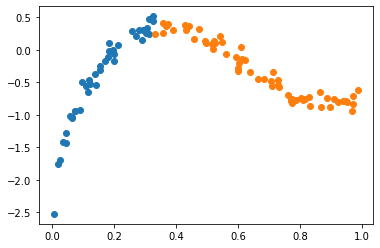

In [223]:
plt.scatter(x_temp_front, y_temp_front), plt.scatter(x_temp_end, y_temp_end)

### Pre-Processing (preparing for model fitting)

In [232]:
int(len(x_temp_front)*0.8)

32

In [247]:
def slicer(x):
    
    a=len(x)
    b=int(0.8*a)

    return b

In [249]:
slicer(x_temp_end)

48

In [250]:
x_data_front_train, y_data_front_train = x_temp_front[:slicer(x_temp_front)], y_temp_front[:slicer(y_temp_front)]
x_data_front_val, y_data_front_val = x_temp_front[slicer(x_temp_front):], y_temp_front[slicer(y_temp_front):]
x_data_end_train, y_data_end_train = x_temp_end[:slicer(x_temp_end)], y_temp_end[:slicer(y_temp_end)]
x_data_end_val, y_data_end_val = x_temp_end[slicer(x_temp_end):], y_temp_end[slicer(y_temp_end):]

In [252]:
len(x_data_front_val)

8

In [253]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'  ##GPU 위로 올리려는 일임 (하드웨어 이슈)

x_front_train_tensor = torch.as_tensor(x_data_front_train).to(device)
y_front_train_tensor = torch.as_tensor(y_data_front_train).to(device)

x_front_val_tensor = torch.as_tensor(x_data_front_val).to(device)
y_front_val_tensor = torch.as_tensor(y_data_front_val).to(device)

x_end_train_tensor = torch.as_tensor(x_data_end_train).to(device)
y_end_train_tensor = torch.as_tensor(y_data_end_train).to(device)

x_end_val_tensor = torch.as_tensor(x_data_end_val).to(device)
y_end_val_tensor = torch.as_tensor(y_data_end_val).to(device)


### Model Fitting

In [273]:
@timer
def quiz_model_1(lr=0.1, epochs=1000):
    #Initialize parameters (초기 설정이 엄청 중요)
    b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
    w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
    
    parameters = [b, w]
    optimizer = optim.SGD(parameters, lr=lr)
    mse_loss = nn.MSELoss()
    
    np.random.seed(42)
    
    for epoch in range(epochs):
        #Loss computation
        y_hat = b + w*x_front_train_tensor
        loss = mse_loss(y_hat, y_front_train_tensor)
        #Graident computation and descent
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    return b, w, loss

In [283]:
b_hat, w_hat, loss = quiz_model_1()
print("b_estimate: {}. w_estimate: {}, mse_loss: {}".format(b_hat, w_hat, loss))

print("answer = {}".format(loss))
#수업 그대로 선형회귀 적용 시 loss값이 개판인 것을 확인할 수 있다. EDA부터 다시 시작.

Execution time of quiz_model_1: 0.13006830215454102 seconds
b_estimate: tensor([-1.2964], requires_grad=True). w_estimate: tensor([5.3219], requires_grad=True), mse_loss: 0.10461384803056717
answer = 0.10461384803056717


##### 어? 더 이상한데? (시간 관계 상 여기서 stop)